In [ ]:
!zip -r myproject.zip . -x ".venv/*"


In [17]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [12]:
# !git clone https://github.com/amir-7979/2PDreamRec
# import os
os.chdir('/home/nit/Desktop/2PDreamRec')

In [30]:
!python3 dataset.py

Extraction complete!
Data loaded: (1000209, 6)
Reindexed data: (1000209, 6)
Processing Users: 100%|█████████████████████| 604/604 [00:00<00:00, 1273.62it/s]
Creating experimental fold 'p1' ...
Processing Users: 100%|███████████████████| 1208/1208 [00:00<00:00, 1427.73it/s]
Creating experimental fold 'p2' ...
Processing Users: 100%|███████████████████| 1208/1208 [00:00<00:00, 1392.06it/s]
Creating experimental fold 'p3' ...
Processing Users: 100%|█████████████████████| 604/604 [00:00<00:00, 1291.99it/s]
Experimental fold 'p3' creation complete!
Saved statics.csv with dataset information.
Nested 10-Fold dataset preparation complete!


In [54]:
#!python -u DreamRec_Gen.py --no-tune
!python3 -u DreamRec_Movies.py --no-tune


Mapping file not found. Proceeding without genre filtering.
Loaded genre-to-movies mapping

========== Running Experimental Fold p3 for Movie Model ==========

========== Experiment p3 ==========
Experiment p3 Epoch 001; Train loss: 0.6310; Time: 00:00:04
Experiment p3 Epoch 002; Train loss: 0.6091; Time: 00:00:04
Experiment p3 Epoch 003; Train loss: 0.5311; Time: 00:00:04
Experiment p3 Epoch 004; Train loss: 0.5216; Time: 00:00:03
Experiment p3 Epoch 005; Train loss: 0.4488; Time: 00:00:03
Experiment p3 Epoch 006; Train loss: 0.4024; Time: 00:00:03
Experiment p3 Epoch 007; Train loss: 0.4311; Time: 00:00:03
Experiment p3 Epoch 008; Train loss: 0.3660; Time: 00:00:03
Experiment p3 Epoch 009; Train loss: 0.3913; Time: 00:00:04
Experiment p3 Epoch 010; Train loss: 0.3152; Time: 00:00:03
Experiment p3: Validation Evaluation at Epoch 10
HR@5       NDCG@5     HR@10      NDCG@10    HR@20      NDCG@20   
0.329470   0.264658   0.397351   0.286752   0.455298   0.301552  
Loss: 0.4923
Experiment

Saved plot to: ./category/plots/param_tuning_lr.png


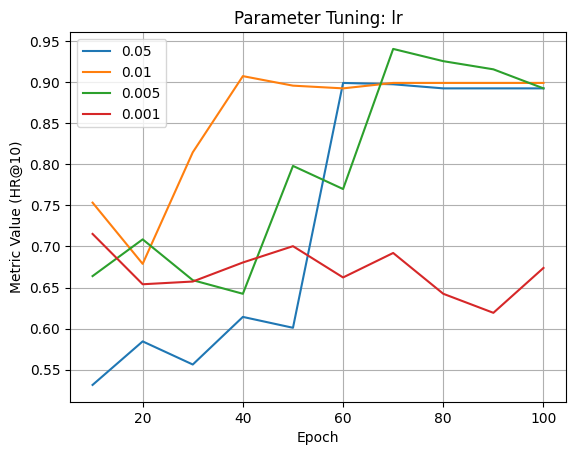

Saved plot to: ./category/plots/param_tuning_optimizer.png


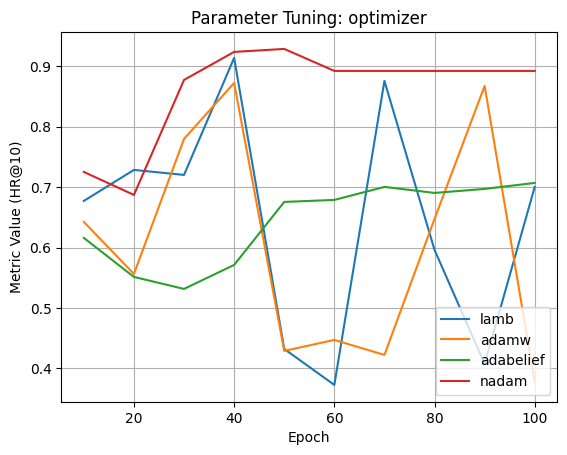

Saved plot to: ./category/plots/param_tuning_timesteps.png


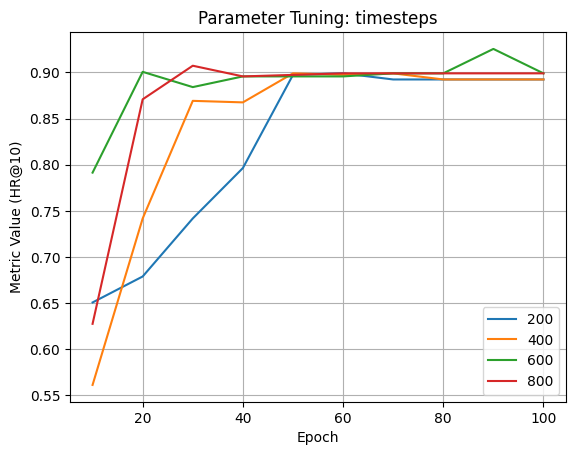

Saved plot to: ./category/plots/metrics_combined.png


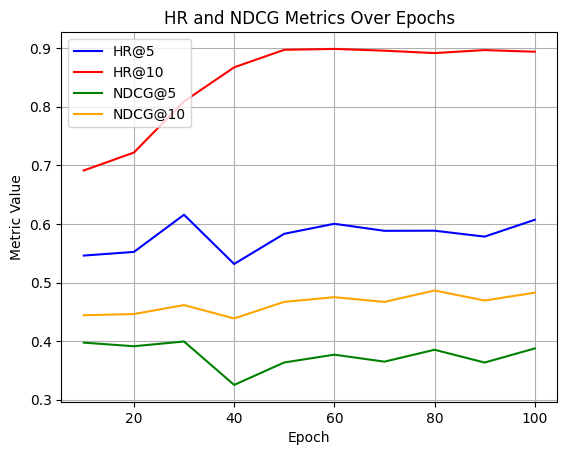

Saved plot to: ./category/plots/train_test_loss.png


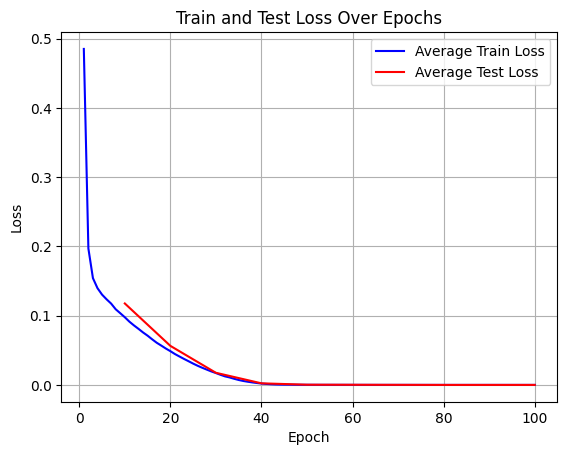

Saved plot to: ./item/plots/param_tuning_lr.png


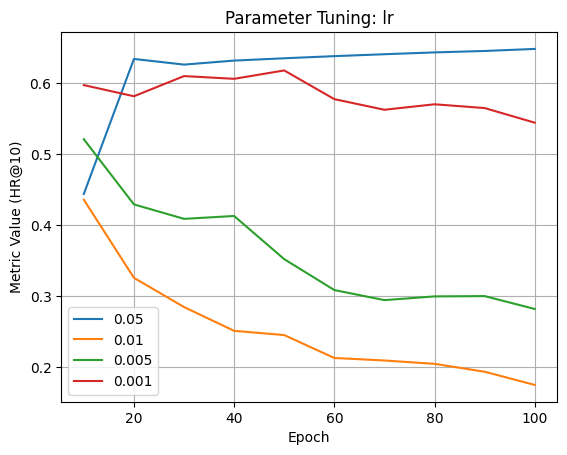

Saved plot to: ./item/plots/param_tuning_optimizer.png


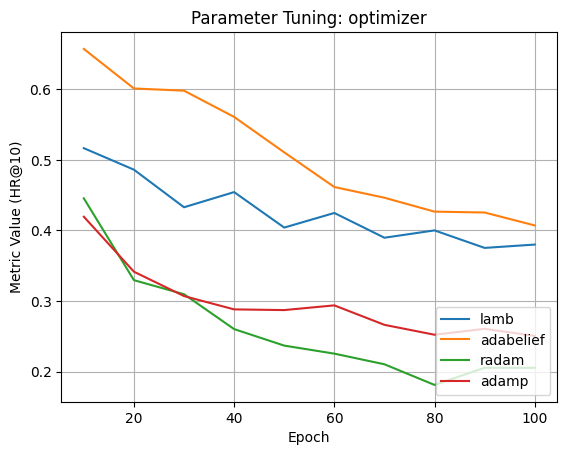

Saved plot to: ./item/plots/param_tuning_timesteps.png


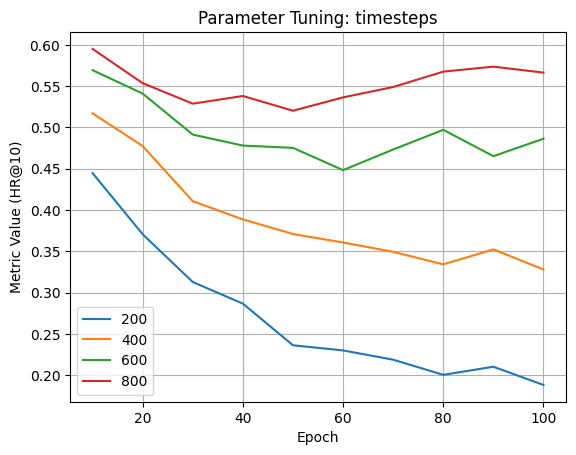

Saved plot to: ./item/plots/metrics_combined.png


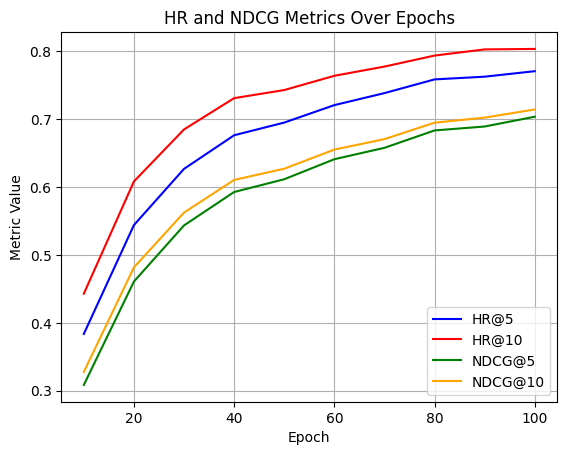

Saved plot to: ./item/plots/train_test_loss.png


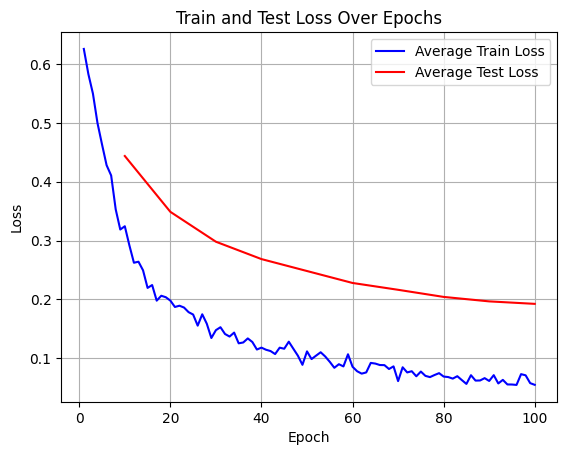

In [41]:
import json
import matplotlib.pyplot as plt
import os

class Plotter:
    def __init__(self, tuning_lr_path=None, tuning_optimizer_path=None, 
                 tuning_timesteps_path=None, average_metrics_path=None, 
                 avg_train_loss_path=None, output_dir='./plots'):
        """Initialize the Plotter with paths to data files and output directory."""
        self.tuning_lr_path = tuning_lr_path
        self.tuning_optimizer_path = tuning_optimizer_path
        self.tuning_timesteps_path = tuning_timesteps_path
        self.average_metrics_path = average_metrics_path
        self.avg_train_loss_path = avg_train_loss_path
        self.output_dir = output_dir
        
        os.makedirs(output_dir, exist_ok=True)

    def _get_plot_filename(self, base_name):
        """Helper method to construct full path for saved plots."""
        return os.path.join(self.output_dir, f'{base_name}.png')

    def plot_param_tuning(self):
        files = [
            ('lr', self.tuning_lr_path),
            ('optimizer', self.tuning_optimizer_path),
            ('timesteps', self.tuning_timesteps_path)
        ]
        
        for param_type, fpath in files:
            if fpath is None:
                continue
                
            with open(fpath, 'r') as f:
                data = json.load(f)
            
            plt.figure()
            for candidate, metrics in data.items():
                epochs = sorted([int(ep) for ep in metrics.keys()])
                values = [metrics[str(ep)] for ep in epochs]
                plt.plot(epochs, values, label=str(candidate))
                
                

            plt.xlabel('Epoch')
            plt.ylabel('Metric Value (HR@10)')
            plt.title(f'Parameter Tuning: {param_type}')
            if param_type == "optimizer":
                plt.legend(loc='lower right')
            else:
                plt.legend(loc='best')
            plt.grid(True)
            
            filename = self._get_plot_filename(f'param_tuning_{param_type}')
            plt.savefig(filename, bbox_inches='tight', dpi=300)
            print(f"Saved plot to: {filename}")
            plt.show()
            plt.close()

    def plot_metrics(self):
        """Plots hit rates and NDCG values in a single figure."""
        if self.average_metrics_path is None:
            print("No average metrics file provided.")
            return
        
        epochs, hr5, hr10, ndcg5, ndcg10 = [], [], [], [], []
        
        with open(self.average_metrics_path, 'r') as f:
            lines = f.readlines()
            if lines[0].strip().startswith("Average Metrics Across Folds"):
                lines = lines[1:]
            header = lines[0].strip().split()
            epoch_idx = header.index("Epoch")
            hr5_idx = header.index("AvgHR@5")
            hr10_idx = header.index("AvgHR@10")
            ndcg5_idx = header.index("AvgNDCG@5")
            ndcg10_idx = header.index("AvgNDCG@10")
            
            for line in lines[1:]:
                if not line.strip():
                    continue
                parts = line.strip().split()
                epochs.append(int(parts[epoch_idx]))
                hr5.append(float(parts[hr5_idx]))
                hr10.append(float(parts[hr10_idx]))
                ndcg5.append(float(parts[ndcg5_idx]))
                ndcg10.append(float(parts[ndcg10_idx]))

        plt.figure()
        plt.plot(epochs, hr5, color='blue', label='HR@5')
        plt.plot(epochs, hr10, color='red', label='HR@10')
        plt.plot(epochs, ndcg5, color='green', label='NDCG@5')
        plt.plot(epochs, ndcg10, color='orange', label='NDCG@10')

    
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.title('HR and NDCG Metrics Over Epochs')
        plt.legend()
        plt.grid(True)
        
        filename = self._get_plot_filename('metrics_combined')
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Saved plot to: {filename}")
        plt.show()
        plt.close()

    def plot_train_test_loss(self):
        """Plots train and test loss curves using blue and red colors."""
        if self.avg_train_loss_path is None or self.average_metrics_path is None:
            print("Train loss or average metrics file not provided.")
            return
        
        train_losses = []
        with open(self.avg_train_loss_path, 'r') as f:
            for line in f:
                if line.strip():
                    train_losses.append(float(line.strip()))
        epochs_train = list(range(1, len(train_losses) + 1))
        
        test_epochs, test_losses = [], []
        with open(self.average_metrics_path, 'r') as f:
            lines = f.readlines()
            if lines[0].strip().startswith("Average Metrics Across Folds"):
                lines = lines[1:]
            header = lines[0].strip().split()
            epoch_idx = header.index("Epoch")
            test_loss_idx = header.index("AvgTestLoss")
            
            for line in lines[1:]:
                if not line.strip():
                    continue
                parts = line.strip().split()
                test_epochs.append(int(parts[epoch_idx]))
                test_losses.append(float(parts[test_loss_idx]))
        
        plt.figure()
        plt.plot(epochs_train, train_losses, color='blue', label='Average Train Loss')
        plt.plot(test_epochs, test_losses, color='red', label='Average Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Train and Test Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        
        filename = self._get_plot_filename('train_test_loss')
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Saved plot to: {filename}")
        plt.show()
        plt.close()
        
# Create and run Plotter instances
plotter = Plotter(
    tuning_lr_path="./category/tuning_lr.json",
    tuning_optimizer_path="./category/tuning_optimizer.json",
    tuning_timesteps_path="./category/tuning_timesteps.json",
    average_metrics_path="./category/average_metrics.txt",
    avg_train_loss_path="./category/avg_train_loss.txt",
    output_dir="./category/plots"
)

plotter.plot_param_tuning()
plotter.plot_metrics()
plotter.plot_train_test_loss()

plotter2 = Plotter(
    tuning_lr_path="./item/tuning_lr.json",
    tuning_optimizer_path="./item/tuning_optimizer.json",
    tuning_timesteps_path="./item/tuning_timesteps.json",
    average_metrics_path="./item/average_metrics.txt",
    avg_train_loss_path="./item/avg_train_loss.txt",
    output_dir="./item/plots"
)

plotter2.plot_param_tuning()
plotter2.plot_metrics()
plotter2.plot_train_test_loss()




Plot saved as paper1_plot.png


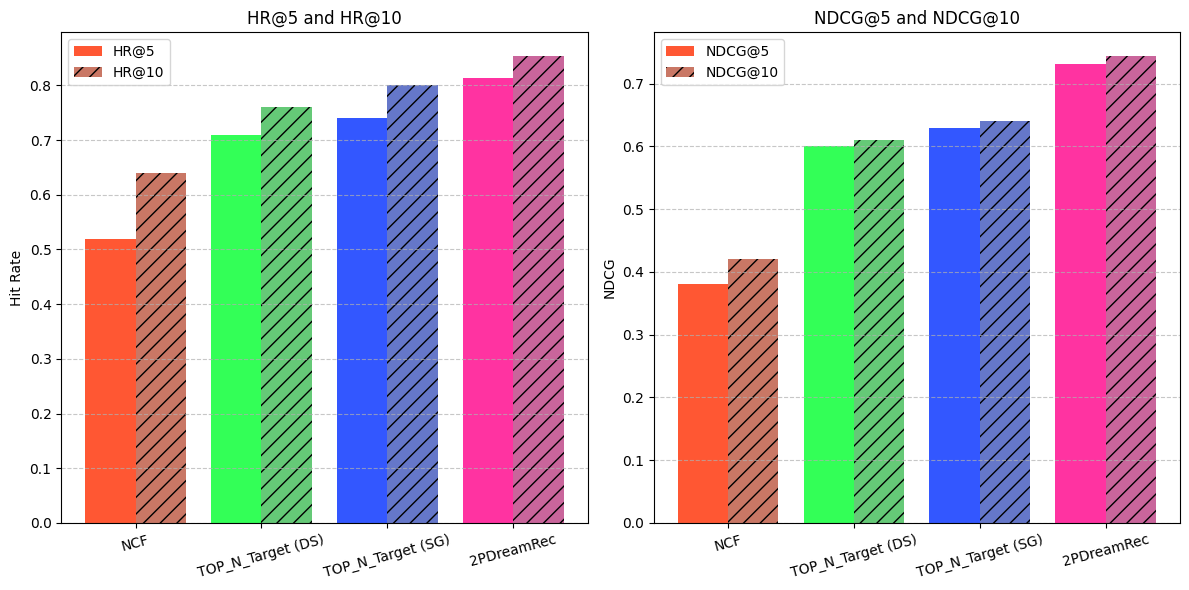

Plot saved as paper2_plot.png


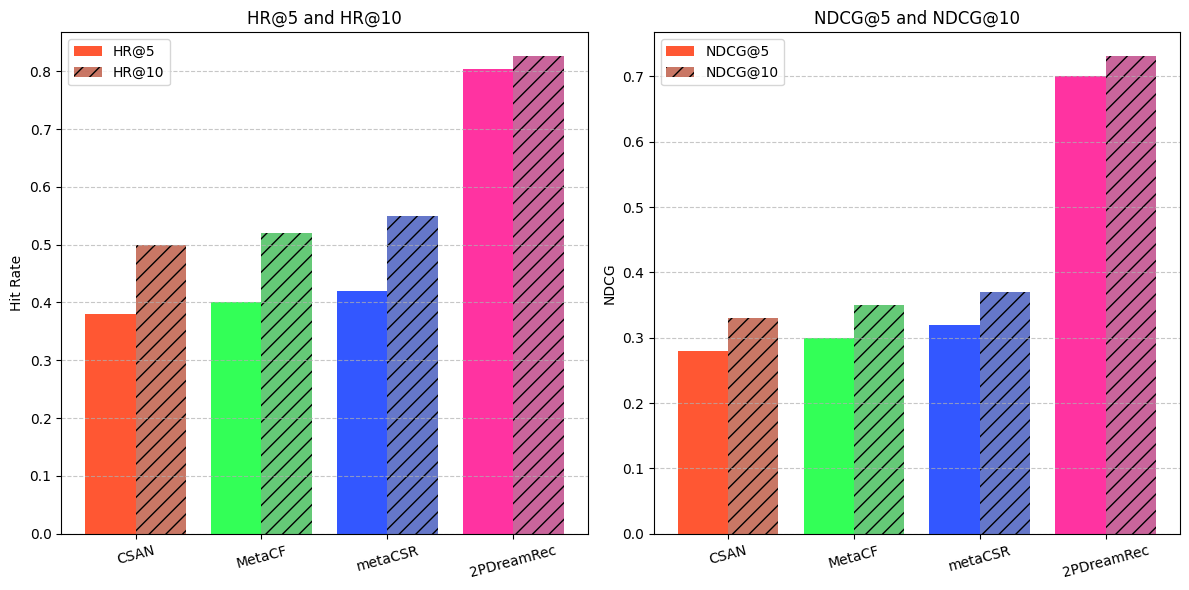

Plot saved as paper3_plot.png


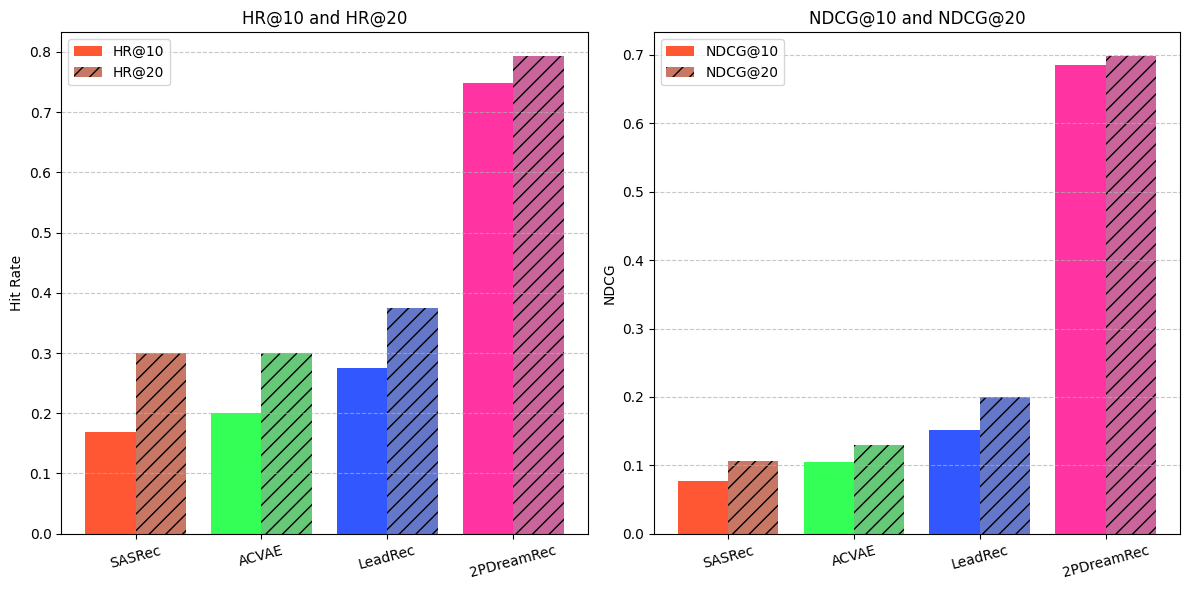

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

def adjust_color_brightness(color, factor):
    """Adjust the brightness of a color."""
    rgb = mcolors.hex2color(color)
    adjusted_rgb = tuple(min(1, max(0, c * factor)) for c in rgb)
    return mcolors.to_hex(adjusted_rgb)
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

def adjust_color_brightness(color, factor):
    """Adjust the brightness of a color."""
    rgb = mcolors.hex2color(color)
    adjusted_rgb = tuple(min(1, max(0, c * factor)) for c in rgb)
    return mcolors.to_hex(adjusted_rgb)

def plot_comparison(models, results, paper_title, save_path=None):
    """
    Generate HR@5, HR@10, NDCG@5, and NDCG@10 comparison plots with improved color contrast and hatching.
    
    Parameters:
        models (list): List of four model names.
        results (dict): Dictionary with model names as keys and their results as values.
        paper_title (str): Title including paper name and year.
        save_path (str, optional): File path to save the plot (e.g., "plot.png").
    """
    base_colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1"]  # Base colors for models
    twin_colors = [adjust_color_brightness(c, 0.7) for c in base_colors]  # Darker variations
    
    plt.figure(figsize=(12, 6))
    
    # Extract results from the input dictionary
    data = {
        "Model": models,
        "HR@5": [results[m][0] for m in models],
        "NDCG@5": [results[m][1] for m in models],
        "HR@10": [results[m][2] for m in models],
        "NDCG@10": [results[m][3] for m in models],
    }
    df = pd.DataFrame(data)
    
    # HR@5 and HR@10
    plt.subplot(1, 2, 1)
    for i, model in enumerate(df["Model"]):
        plt.bar(i - 0.2, df["HR@5"][i], width=0.4, color=base_colors[i], label="HR@5" if i == 0 else "")
        plt.bar(i + 0.2, df["HR@10"][i], width=0.4, color=twin_colors[i], hatch="//", alpha=0.7, label="HR@10" if i == 0 else "")
    plt.xticks(range(len(df["Model"])), df["Model"], rotation=15)
    plt.ylabel("Hit Rate")
    plt.title(f"HR@5 and HR@10")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # NDCG@5 and NDCG@10
    plt.subplot(1, 2, 2)
    for i, model in enumerate(df["Model"]):
        plt.bar(i - 0.2, df["NDCG@5"][i], width=0.4, color=base_colors[i], label="NDCG@5" if i == 0 else "")
        plt.bar(i + 0.2, df["NDCG@10"][i], width=0.4, color=twin_colors[i], hatch="//", alpha=0.7, label="NDCG@10" if i == 0 else "")
    plt.xticks(range(len(df["Model"])), df["Model"], rotation=15)
    plt.ylabel("NDCG")
    plt.title(f"NDCG@5 and NDCG@10")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()

    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved as {save_path}")

    plt.show()

def plot_comparison2(models, results, paper_title, save_path=None):
    """
    Generate HR@10, HR@20, NDCG@10, and NDCG@20 comparison plots and optionally save them.
    """
    base_colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1"]  # Base colors for models
    twin_colors = [adjust_color_brightness(c, 0.7) for c in base_colors]  # Darker variations
    
    plt.figure(figsize=(12, 6))
    
    # Extract results from the input dictionary
    data = {
        "Model": models,
        "HR@10": [results[m][0] for m in models],
        "NDCG@10": [results[m][1] for m in models],
        "HR@20": [results[m][2] for m in models],
        "NDCG@20": [results[m][3] for m in models],
    }
    df = pd.DataFrame(data)
    
    plt.subplot(1, 2, 1)
    for i, model in enumerate(df["Model"]):
        plt.bar(i - 0.2, df["HR@10"][i], width=0.4, color=base_colors[i], label="HR@10" if i == 0 else "")
        plt.bar(i + 0.2, df["HR@20"][i], width=0.4, color=twin_colors[i], hatch="//", alpha=0.7, label="HR@20" if i == 0 else "")
    plt.xticks(range(len(df["Model"])), df["Model"], rotation=15)
    plt.ylabel("Hit Rate")
    plt.title(f"HR@10 and HR@20")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # NDCG@10 and NDCG@20
    plt.subplot(1, 2, 2)
    for i, model in enumerate(df["Model"]):
        plt.bar(i - 0.2, df["NDCG@10"][i], width=0.4, color=base_colors[i], label="NDCG@10" if i == 0 else "")
        plt.bar(i + 0.2, df["NDCG@20"][i], width=0.4, color=twin_colors[i], hatch="//", alpha=0.7, label="NDCG@20" if i == 0 else "")
    plt.xticks(range(len(df["Model"])), df["Model"], rotation=15)
    plt.ylabel("NDCG")
    plt.title(f"NDCG@10 and NDCG@20")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()

    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved as {save_path}")

    plt.show()

# Example usage with save functionality


# Define model results for Paper 1, Paper 2, and Paper 3
p1_results = {
    "NCF": [0.52, 0.38, 0.64, 0.42],
    "TOP_N_Target (DS)": [0.71, 0.60, 0.76, 0.61],
    "TOP_N_Target (SG)": [0.74, 0.63, 0.80, 0.64],
    "2PDreamRec": [0.8137,	0.7314,	0.8543,	0.7446],
}

p2_results = {
    "CSAN": [0.38, 0.28, 0.50, 0.33],
    "MetaCF": [0.40, 0.30, 0.52, 0.35],
    "metaCSR": [0.42, 0.32, 0.55, 0.37],
    "2PDreamRec": [0.8046,	0.7005,	0.8260,	0.7308],
}
p3_results = {
    "SASRec": [0.1689, 0.0772, 0.30, 0.1059],
    "ACVAE": [0.20, 0.1054, 0.30, 0.13],
    "LeadRec": [0.2753, 0.1510, 0.3753, 0.20],
    "2PDreamRec": [0.7483,	0.6847,	0.7930,	0.6982],
}

plot_comparison(["NCF", "TOP_N_Target (DS)", "TOP_N_Target (SG)", "2PDreamRec"], p1_results, "", "paper1_plot.png")
plot_comparison(["CSAN", "MetaCF", "metaCSR", "2PDreamRec"], p2_results, "", "paper2_plot.png")
plot_comparison2(["SASRec", "ACVAE", "LeadRec", "2PDreamRec"], p3_results, "", "paper3_plot.png")